In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

        # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ghw-heart-failure-readmission-prediction-dataset/GHW_HeartFailure_Readmission_60Days.csv
/kaggle/input/ghw-heart-failure-readmission-prediction-dataset/GHW_HeartFailure_Readmission_Combined.csv
/kaggle/input/ghw-heart-failure-readmission-prediction-dataset/GHW_HeartFailure_Readmission.csv


# Libraries

In [2]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dataset Files
file1 = "/kaggle/input/ghw-heart-failure-readmission-prediction-dataset/GHW_HeartFailure_Readmission.csv"
file2 = "/kaggle/input/ghw-heart-failure-readmission-prediction-dataset/GHW_HeartFailure_Readmission_60Days.csv"
file3 = "/kaggle/input/ghw-heart-failure-readmission-prediction-dataset/GHW_HeartFailure_Readmission_Combined.csv"


In [4]:
#Load the datasets
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Basic EDA

**Analysing the files and their differences**

In [5]:
print("File 1 Shape (HeartFailure_Readmission.csv):", df1.shape)
print("File 2 Shape (HeartFailure_Readmission_60Days.csv):", df2.shape)
print("File 3 Shape (HeartFailure_Readmission_Combined.csv):", df3.shape)

File 1 Shape (HeartFailure_Readmission.csv): (1000, 20)
File 2 Shape (HeartFailure_Readmission_60Days.csv): (1000, 21)
File 3 Shape (HeartFailure_Readmission_Combined.csv): (1000, 22)


**Checking the dataframe columns**

In [6]:
print("\nFile 1 (HeartFailure_Readmission) Columns:\n", df1.columns)
print("\nFile 2 (HeartFailure_Readmission_60Days) Columns:\n", df2.columns)
print("\nFile 3 (HeartFailure_Readmission_Combined) Columns:\n", df3.columns)


File 1 (HeartFailure_Readmission) Columns:
 Index(['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Length_of_Stay',
       'Previous_Admissions', 'Discharge_Disposition', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days'],
      dtype='object')

File 2 (HeartFailure_Readmission_60Days) Columns:
 Index(['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Length_of_Stay',
       'Previous_Admissions', 'Discharge_Disposition', 'Pulse', 'Temperature',
       'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
       'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction',
       'Readmission_30Days', 'Readmission_60Days'],
      dtype='object')

File 3 (HeartFailure_Readmission_Combined) Columns:
 Index(['Patient_ID', 'Age', 'Gender', 'Ethnicity', 'Length_of_Stay',
       'Previous_Admissions', 'Discharge_D

Finding the differences in each datasets

In [7]:
cols1 = set(df1.columns)
cols2 = set(df2.columns)
cols3 = set(df3.columns)

# Unique columns in each dataset
print("Columns only in File 1 (Base):", cols1 - cols2)
print("Columns only in File 2 (60Days):", cols2 - cols1)
print("Columns only in File 3 (Combined):", cols3 - cols1 - cols2)

print("\nCommon columns across all files:\n", cols1 & cols2 & cols3)

Columns only in File 1 (Base): set()
Columns only in File 2 (60Days): {'Readmission_60Days'}
Columns only in File 3 (Combined): {'Readmission_30or60Days'}

Common columns across all files:
 {'NT_proBNP', 'Patient_ID', 'Previous_Admissions', 'Temperature', 'Systolic_BP', 'Pulse', 'Creatinine', 'Age', 'Readmission_30Days', 'Ethnicity', 'Sodium', 'Length_of_Stay', 'BUN', 'Discharge_Disposition', 'Heart_Rate', 'Ejection_Fraction', 'Gender', 'Respiratory_Rate', 'Diastolic_BP', 'Hemoglobin'}


In [8]:
print(f"\nFile 1 Head:")
df1.head()


File 1 Head:


,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days
0,1,83,Male,Other,7,4,Rehab,119,37.1,147,160,99,27,11,0.61,127,13.1,2973,39,0
1,2,73,Female,Hispanic,10,2,Home,107,38.4,54,151,75,13,15,1.48,145,11.4,3220,56,0
2,3,59,Female,White,5,1,Expired,63,39.0,118,112,57,21,26,1.54,147,10.9,1190,50,0
3,4,87,Female,White,8,3,Expired,86,39.2,80,135,55,27,34,1.63,133,10.1,2934,29,1
4,5,52,Female,Asian,1,1,Home,117,38.5,94,145,79,16,32,2.57,146,12.8,4324,37,0


In [9]:
print(f"\nFile 2 Head:")
df2.head()


File 2 Head:


,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,...,Diastolic_BP,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days,Readmission_60Days
0,1,83,Male,Other,7,4,Rehab,119,37.1,147,...,99,27,11,0.61,127,13.1,2973,39,0,0
1,2,73,Female,Hispanic,10,2,Home,107,38.4,54,...,75,13,15,1.48,145,11.4,3220,56,0,0
2,3,59,Female,White,5,1,Expired,63,39.0,118,...,57,21,26,1.54,147,10.9,1190,50,0,0
3,4,87,Female,White,8,3,Expired,86,39.2,80,...,55,27,34,1.63,133,10.1,2934,29,1,1
4,5,52,Female,Asian,1,1,Home,117,38.5,94,...,79,16,32,2.57,146,12.8,4324,37,0,0


In [10]:
print(f"\nFile 3 Head:")
df3.head()


File 3 Head:


,Patient_ID,Age,Gender,Ethnicity,Length_of_Stay,Previous_Admissions,Discharge_Disposition,Pulse,Temperature,Heart_Rate,...,Respiratory_Rate,BUN,Creatinine,Sodium,Hemoglobin,NT_proBNP,Ejection_Fraction,Readmission_30Days,Readmission_60Days,Readmission_30or60Days
0,1,83,Male,Other,7,4,Rehab,119,37.1,147,...,27,11,0.61,127,13.1,2973,39,0,0,0
1,2,73,Female,Hispanic,10,2,Home,107,38.4,54,...,13,15,1.48,145,11.4,3220,56,0,0,0
2,3,59,Female,White,5,1,Expired,63,39.0,118,...,21,26,1.54,147,10.9,1190,50,0,0,0
3,4,87,Female,White,8,3,Expired,86,39.2,80,...,27,34,1.63,133,10.1,2934,29,1,1,1
4,5,52,Female,Asian,1,1,Home,117,38.5,94,...,16,32,2.57,146,12.8,4324,37,0,0,0


There seems to be no difference in row data in all three dataframes. So proceeeding further analysis with the combined csv file which contain all the 1000 rows of data and the 22 columns, i.e df3

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic informations
print(f"Shape : {df3.shape}")
print(df3.info())
print(df3.isnull().sum())

Shape : (1000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              1000 non-null   int64  
 1   Age                     1000 non-null   int64  
 2   Gender                  1000 non-null   object 
 3   Ethnicity               1000 non-null   object 
 4   Length_of_Stay          1000 non-null   int64  
 5   Previous_Admissions     1000 non-null   int64  
 6   Discharge_Disposition   1000 non-null   object 
 7   Pulse                   1000 non-null   int64  
 8   Temperature             1000 non-null   float64
 9   Heart_Rate              1000 non-null   int64  
 10  Systolic_BP             1000 non-null   int64  
 11  Diastolic_BP            1000 non-null   int64  
 12  Respiratory_Rate        1000 non-null   int64  
 13  BUN                     1000 non-null   int64  
 14  Creatinine            

In [12]:
print(df3['Gender'].unique())
print(df3['Ethnicity'].unique())
print(df3['Discharge_Disposition'].unique())

['Male' 'Female']
['Other' 'Hispanic' 'White' 'Asian' 'Black']
['Rehab' 'Home' 'Expired' 'Nursing Facility']


No missing values

'Gender', 'Ethnicity', 'Discharge_Disposition' are in Object Datatype needs one-hot encoding

In [13]:
# One-hot encode categorical variables
df_cleaned = pd.get_dummies(df3, columns=['Gender', 'Ethnicity', 'Discharge_Disposition'], drop_first=True)

In [14]:
df_cleaned.head()

,Patient_ID,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,...,Readmission_60Days,Readmission_30or60Days,Gender_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Other,Ethnicity_White,Discharge_Disposition_Home,Discharge_Disposition_Nursing Facility,Discharge_Disposition_Rehab
0,1,83,7,4,119,37.1,147,160,99,27,...,0,0,True,False,False,True,False,False,False,True
1,2,73,10,2,107,38.4,54,151,75,13,...,0,0,False,False,True,False,False,True,False,False
2,3,59,5,1,63,39.0,118,112,57,21,...,0,0,False,False,False,False,True,False,False,False
3,4,87,8,3,86,39.2,80,135,55,27,...,1,1,False,False,False,False,True,False,False,False
4,5,52,1,1,117,38.5,94,145,79,16,...,0,0,False,False,False,False,False,True,False,False


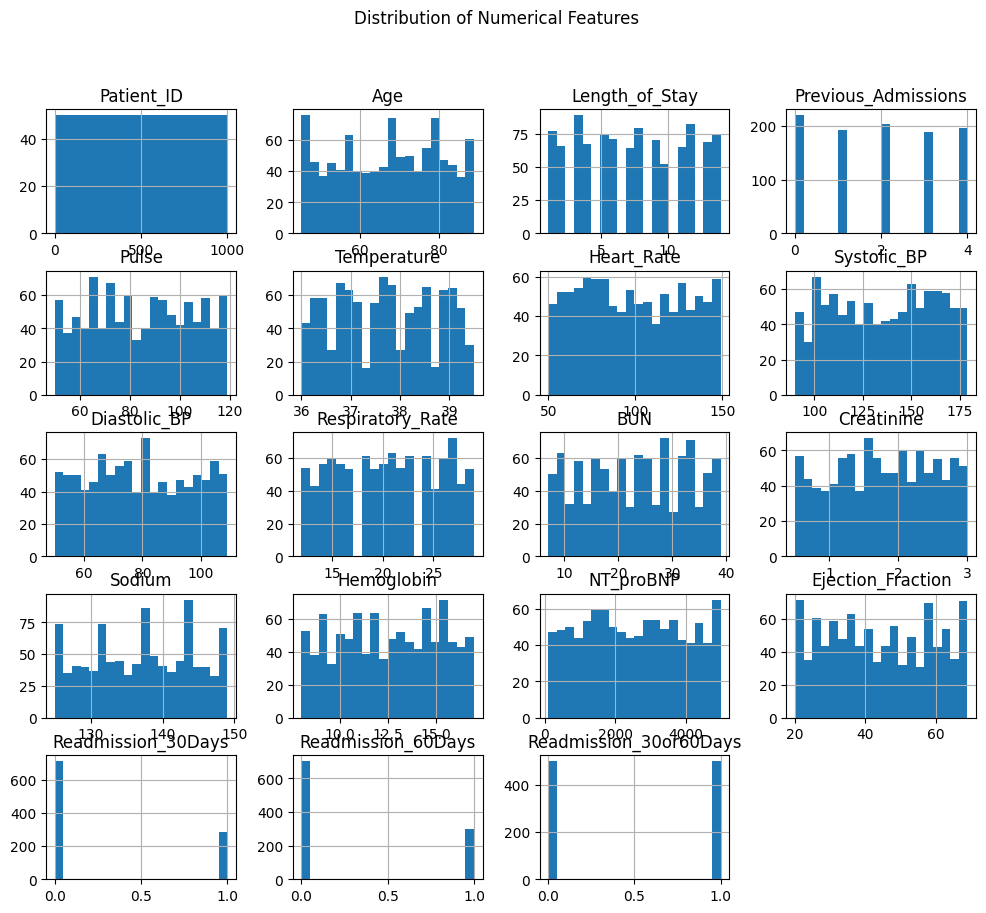

In [15]:
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle('Distribution of Numerical Features')
plt.show()

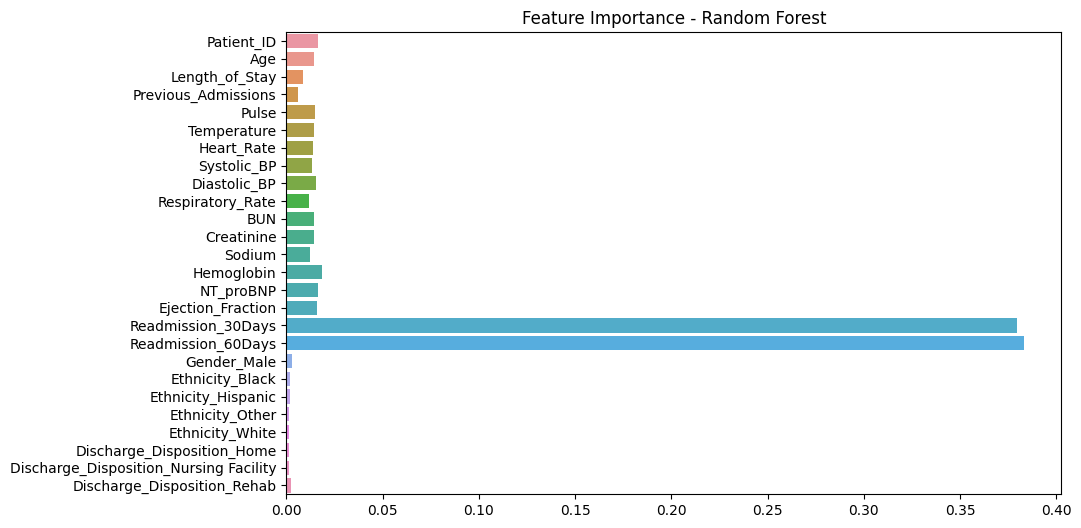

In [16]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
target = 'Readmission_30or60Days'
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]
model.fit(X, y)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Feature Importance - Random Forest')
plt.show()

Feature correaltion seems weak between all most all of the variables.

For Numerical Variables Standard Scaling 

In [17]:
# Numeric features for Standard scaling
from sklearn.preprocessing import StandardScaler
num_cols = ['Age', 'Length_of_Stay', 'Previous_Admissions', 'Pulse', 'Temperature',
            'Heart_Rate', 'Systolic_BP', 'Diastolic_BP', 'Respiratory_Rate', 'BUN',
            'Creatinine', 'Sodium', 'Hemoglobin', 'NT_proBNP', 'Ejection_Fraction']

scaler = StandardScaler()
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

In [18]:
df_cleaned.head()

,Patient_ID,Age,Length_of_Stay,Previous_Admissions,Pulse,Temperature,Heart_Rate,Systolic_BP,Diastolic_BP,Respiratory_Rate,...,Readmission_60Days,Readmission_30or60Days,Gender_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Other,Ethnicity_White,Discharge_Disposition_Home,Discharge_Disposition_Nursing Facility,Discharge_Disposition_Rehab
0,1,1.236563,-0.099650,1.436231,1.713233,-0.614724,1.652056,0.944636,1.136759,1.261865,...,0,0,True,False,False,True,False,False,False,True
1,2,0.463711,0.634873,0.036396,1.113607,0.684059,-1.533538,0.597726,-0.247352,-1.482598,...,0,0,False,False,True,False,False,True,False,False
2,3,-0.618282,-0.589333,-0.663522,-1.085025,1.283497,0.658699,-0.905551,-1.285435,0.085666,...,0,0,False,False,False,False,True,False,False,False
3,4,1.545704,0.145191,0.736313,0.064260,1.483309,-0.642942,-0.019003,-1.400778,1.261865,...,1,1,False,False,False,False,True,False,False,False
4,5,-1.159278,-1.568697,-0.663522,1.613296,0.783965,-0.163390,0.366453,-0.016667,-0.894499,...,0,0,False,False,False,False,False,True,False,False


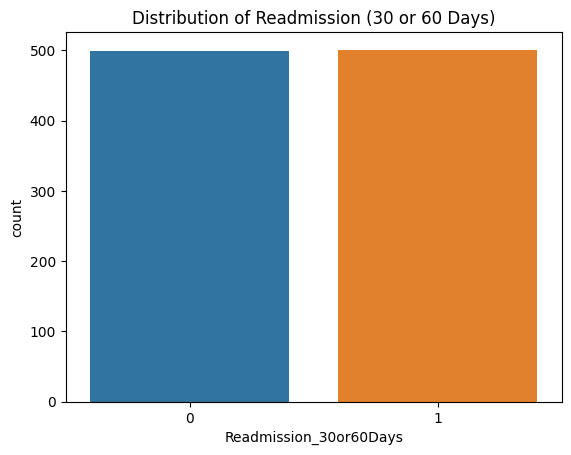

Readmission_30or60Days
1    0.501
0    0.499
Name: proportion, dtype: float64


In [19]:
# Class distribution
target = 'Readmission_30or60Days'

sns.countplot(x=target, data=df_cleaned)
plt.title("Distribution of Readmission (30 or 60 Days)")
plt.show()

print(df_cleaned[target].value_counts(normalize=True))

We have a balanced dataset.

# Correlation Heatmap

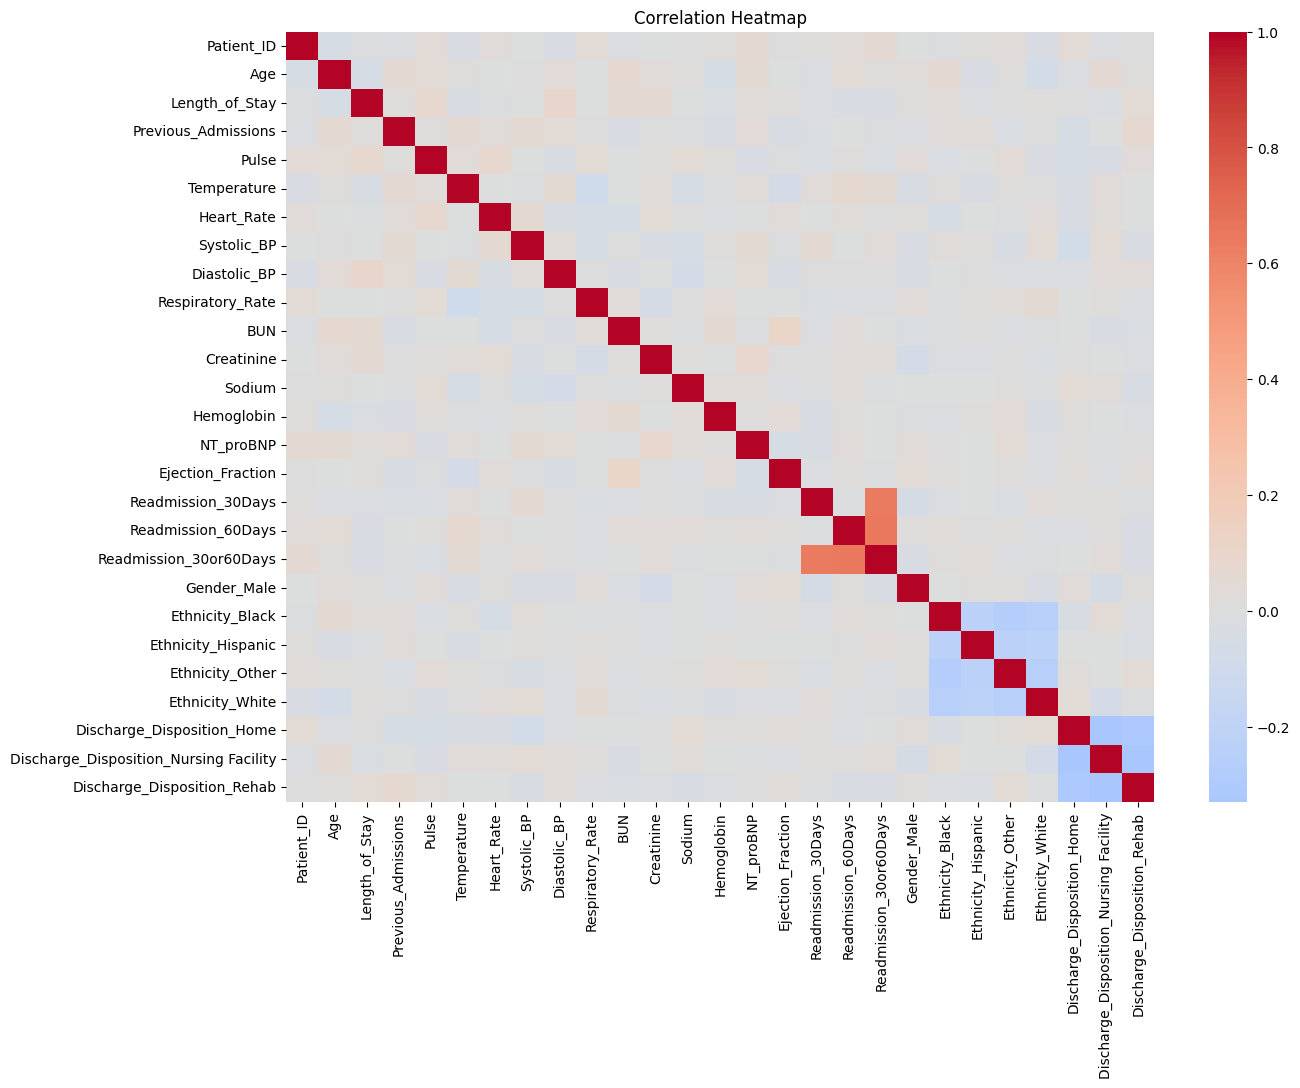

In [20]:
plt.figure(figsize=(14, 10))
sns.heatmap(df_cleaned.corr(), cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.show()

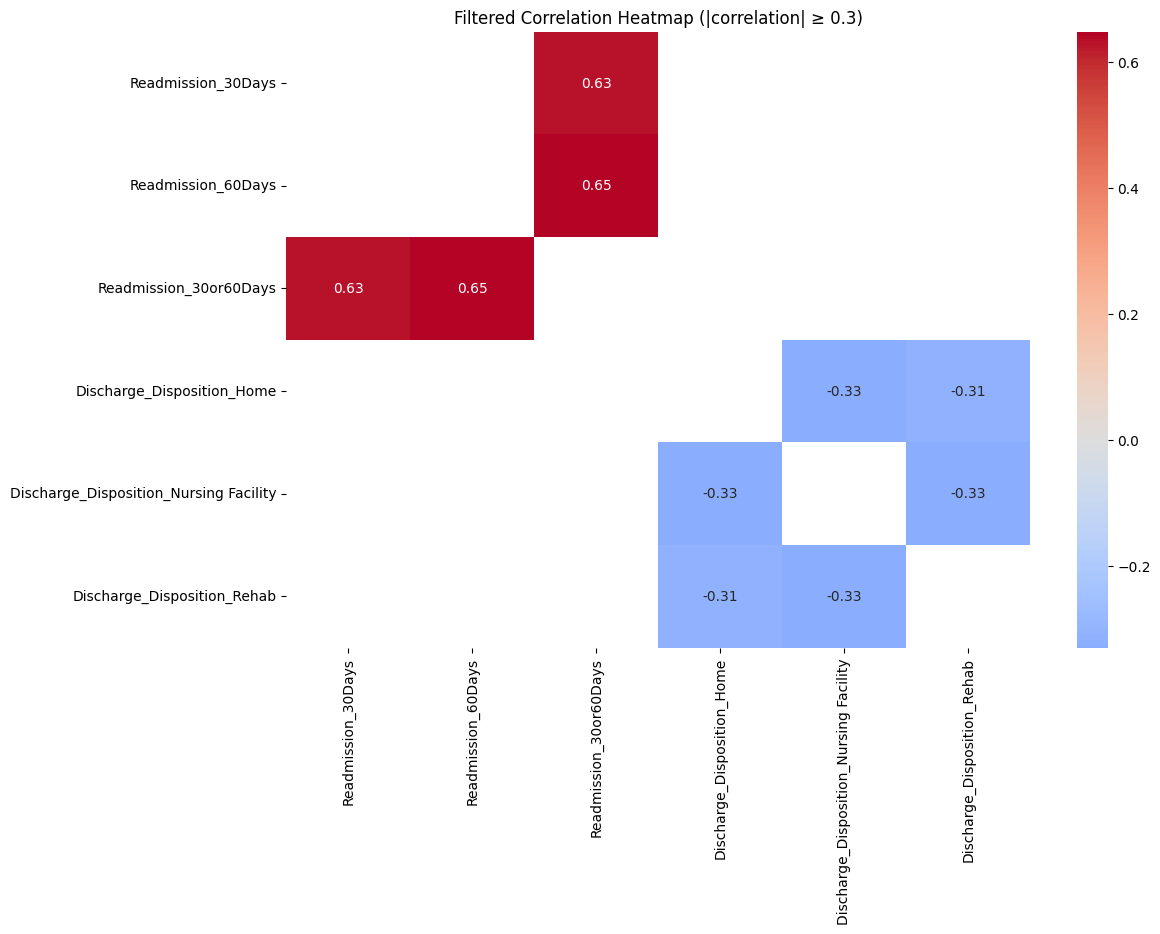

In [21]:
corr_matrix = df_cleaned.corr()

# Filter out weak correlations (keep only those >= 0.5 or <= -0.5)
filtered_corr = corr_matrix[(np.abs(corr_matrix) >= 0.3) & (corr_matrix != 1.0)]

# Drop rows/columns that are all NaN (i.e., no strong correlations)
filtered_corr = filtered_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, cmap='coolwarm', annot=True, center=0)
plt.title("Filtered Correlation Heatmap (|correlation| ≥ 0.3)")
plt.show()

Correlation with the target variable - it's clear that most variables have low correlations with each other and with the readmission outcomes

In [22]:
target_corr = corr_matrix['Readmission_30or60Days']
strong_target_corr = target_corr[np.abs(target_corr) >= 0.3]  

print("Strong correlations with Readmission_30or60Days:")
print(strong_target_corr.sort_values(ascending=False))


Strong correlations with Readmission_30or60Days:
Readmission_30or60Days    1.000000
Readmission_60Days        0.648682
Readmission_30Days        0.633181
Name: Readmission_30or60Days, dtype: float64


In [23]:
weak_target_corr = target_corr[(target_corr) <= 0]

print("Weak correlations with Readmission_30or60Days:")
print(weak_target_corr.sort_values(ascending=False))


Weak correlations with Readmission_30or60Days:
Hemoglobin                    -0.004470
BUN                           -0.005682
Discharge_Disposition_Home    -0.005822
Ethnicity_White               -0.008580
Sodium                        -0.010433
Ejection_Fraction             -0.011632
Previous_Admissions           -0.012526
Ethnicity_Other               -0.015808
Respiratory_Rate              -0.021980
Pulse                         -0.027454
Discharge_Disposition_Rehab   -0.031686
Gender_Male                   -0.034150
Length_of_Stay                -0.038150
Name: Readmission_30or60Days, dtype: float64


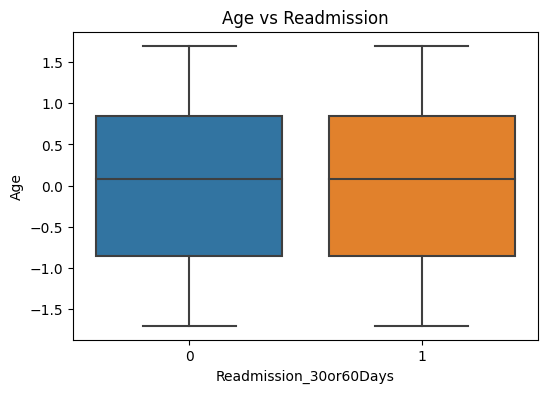

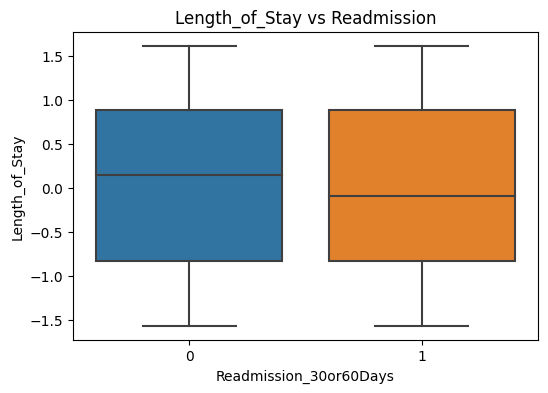

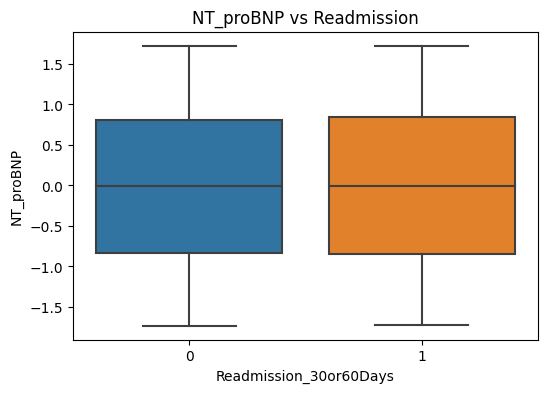

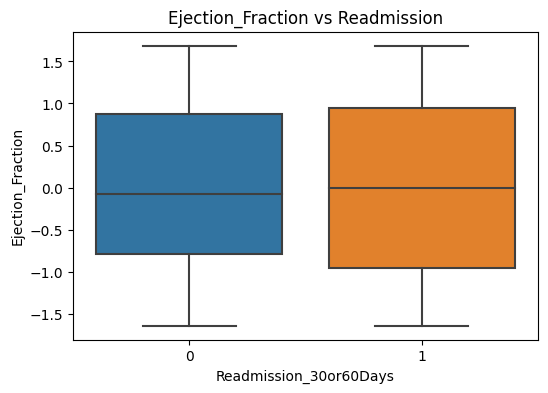

In [24]:
for col in ['Age', 'Length_of_Stay', 'NT_proBNP', 'Ejection_Fraction']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=target, y=col, data=df_cleaned)
    plt.title(f"{col} vs Readmission")
    plt.show()


# Train- Test Split

In [25]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df_cleaned.drop(['Readmission_30Days', 'Readmission_60Days', 'Readmission_30or60Days'], axis=1)
y = df_cleaned['Readmission_30or60Days']  

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


In [27]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       100
           1       0.45      0.45      0.45       100

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200

Confusion Matrix:
[[46 54]
 [55 45]]
ROC-AUC Score: 0.46


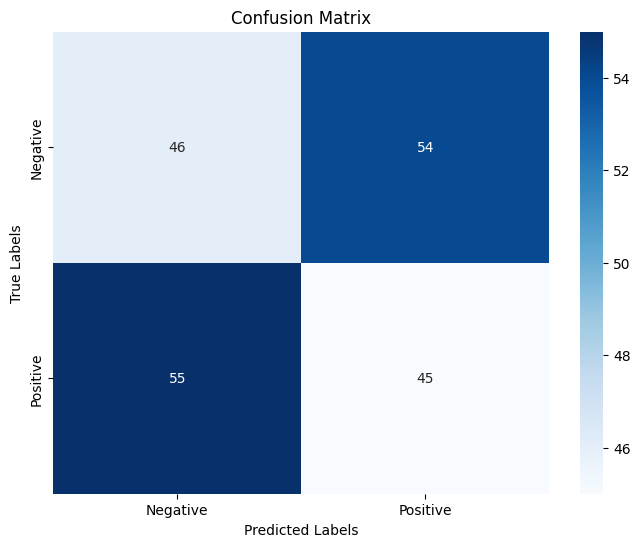

In [28]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

ROC-AUC Score 0.46 is less than 50% probability of predicting the true outcome. Model is not learning any meaningful patterns.

# Random ForestClassifier | Gradient Boosting | XGBoost

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\n")


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       100
           1       0.53      0.49      0.51       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

ROC-AUC Score: 0.5189


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       100
           1       0.47      0.47      0.47       100

    accuracy                           0.47       200
   macro avg       0.46      0.46      0.46       200
weighted avg       0.46      0.47      0.46       200

ROC-AUC Score: 0.48290000000000005


--- XGBoost ---
              precision    recall  f1-score   support

           0       0.54      0.61      0.57       100
           1       0.55      0.47      0.51       100

    accuracy                           0.54       200
   

All the models (Random ForestClassifier | Gradient Boosting | XGBoost) is only generating random guess performance (0.5) like 50-50 chance predictions. This indicates that the dataset is weak and possible weak features

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       100
           1       0.45      0.45      0.45       100

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200

ROC-AUC Score: 0.4603


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.53      0.57      0.55       100
           1       0.53      0.49      0.51       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200

ROC-AUC Score: 0.5189


--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       100
           1       0.47      0.47      0.47       100

    accuracy                           0.47       200
   m

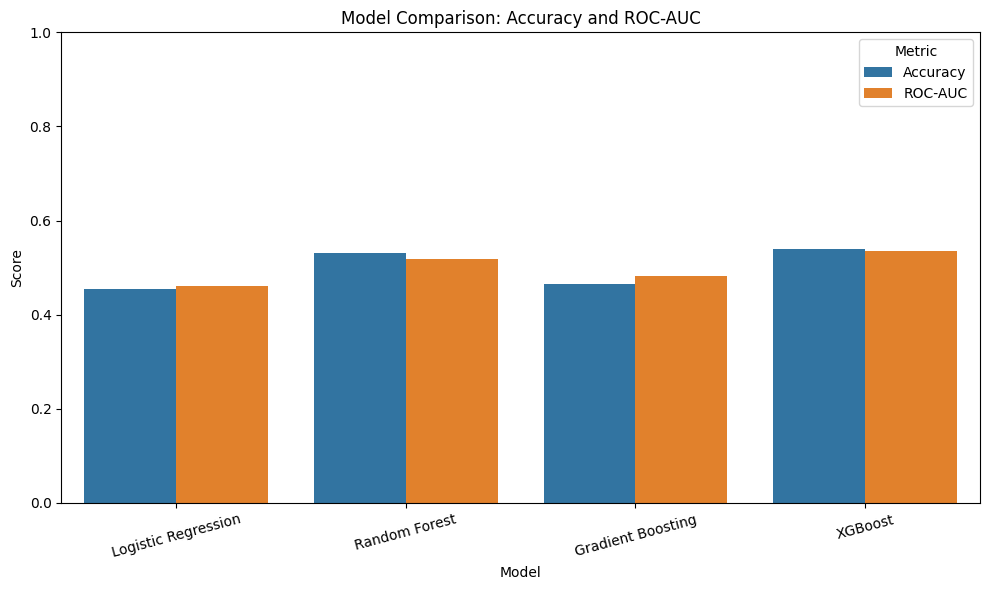

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Collect metrics
results = {'Model': [], 'Accuracy': [], 'ROC-AUC': []}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results['Model'].append(name)
    results['Accuracy'].append(acc)
    results['ROC-AUC'].append(auc)

    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", auc)
    print("\n")

# Plotting
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Comparison: Accuracy and ROC-AUC")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Feature Importance

<Figure size 1000x800 with 0 Axes>

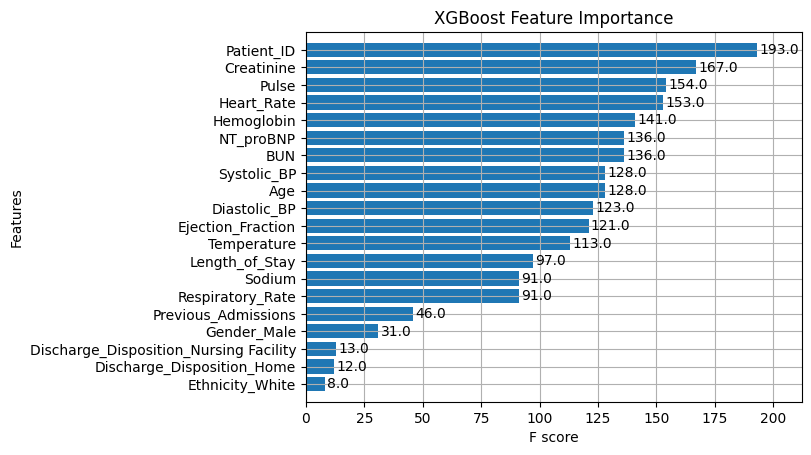

In [31]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Fit the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=20, height=0.8, title="XGBoost Feature Importance")
plt.show()


Clustering and PCA 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [33]:
X = df_cleaned.drop(['Readmission_30Days', 'Readmission_60Days', 'Readmission_30or60Days'], axis=1)
y = df_cleaned['Readmission_30or60Days']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


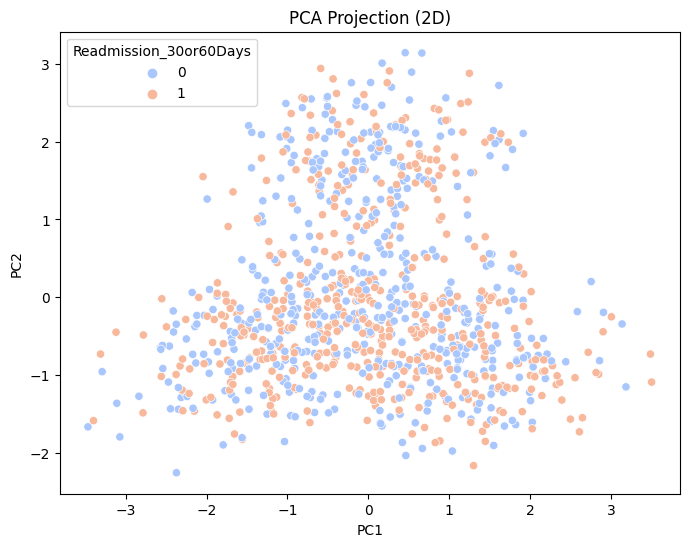

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.title('PCA Projection (2D)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


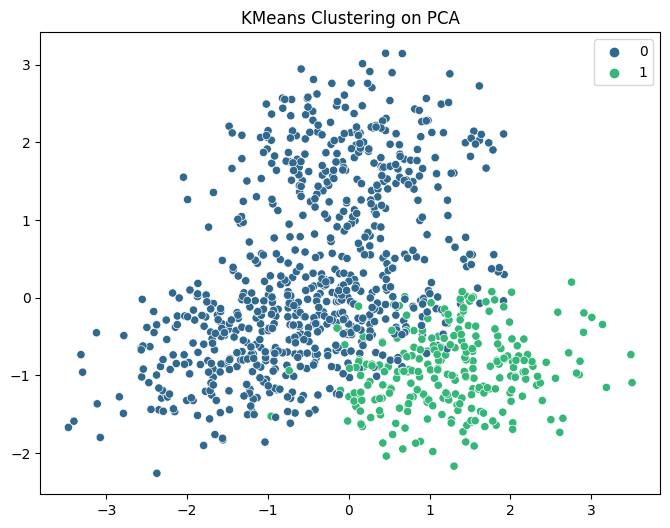

Silhouette Score: 0.05253828007356533


In [35]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('KMeans Clustering on PCA')
plt.show()

print("Silhouette Score:", silhouette_score(X_scaled, clusters))


Dataset is not be large enough for robust patterns to emerge. It appears that the dataset is weakly predictive. Data quality or volume might be the limiting factor

# End of File